# Practical 5: Classification
### Prepared by: <a href="https://www.linkedin.com/in/a-kanaan/">Dr Abdulkarim M. Jamal Kanaan</a>
<hr>

* Acknowledgements: I would like to acknowledge the book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" written by Aurélien Géron. This practical exercise was heavily influenced by Chapter 3 of the book, titled "Classification."

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/a-kanaan/dm-practicals/blob/main/practical4/practical6_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## Loading Data

In [ ]:
from sklearn.datasets import fetch_openml
#28x28
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
print(mnist.keys())
#data = input feature; target = variable(y)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
X, y = mnist.data, mnist.target

print('pixels:\n', X[:5,:])
print()
print('labels:\n', y[:5])

pixels:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

labels:
 ['5' '0' '4' '1' '9']


(-0.5, 27.5, 27.5, -0.5)

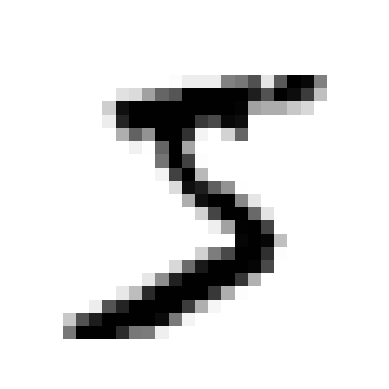

In [ ]:
#sample
import matplotlib.pyplot as plt

sample=X[0]
plt.imshow(sample.reshape(28,28), cmap="binary")
plt.axis("off")

## Split Data Into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classification

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train_5)

DecisionTreeClassifier(random_state=42)

## Tree Visualizization

In [ ]:
#%pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_clf,
                           feature_names=['p'+str(i) for i in range(X_train.shape[1])],
                           class_names=['5','not 5'],
                           filled=True,
                           out_file=None)


graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.903244 to fit



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(random_state=42, max_iter=1000, penalty='l2')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
log_reg.fit(X_train_scaled, y_train_5)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
log_reg.classes_

array([False,  True])

In [ ]:
print(log_reg.predict_proba(X_train_scaled[:5]).round(2))

[[0.13 0.87]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


In [ ]:
print(log_reg.predict(X_train_scaled[:5]))

[ True False False False False]


## Classification Measures (Performance)

### Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.97395, 0.97165, 0.97055])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
#dummy_clf.fit(X_train, y_train_5)
#print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Confusion Matrices (CM)

A confusion matrix, also known as an error matrix, is a specific table layout that is often used in supervised learning. It is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. It shows the ways in which your classification model is confused when it makes predictions.

|           | Predicted Negative | Predicted Positive |
|-----------|:------------------:|-------------------:|
| Actual Negative | TN                 | FP                |
| Actual Positive | FN                 | TP                |

- True Positive (TP): The predicted value matches the actual value, and the actual value is positive.
- True Negative (TN): The predicted value matches the actual value, and the actual value is negative.
 - False Positive (FP): The predicted value doesn't match the actual value, and the actual value is negative.
- False Negative (FN): The predicted value doesn't match the actual value, and the actual value is positive.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(tree_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53712,   867],
       [  810,  4611]], dtype=int64)

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision & Recall
 - Precision (Accuracy of Positive Predictions)
    - Precision = TP / (TP + FP)
    - Precision is used when the costs of False Positives is high. For example, email spam detection. In this case, you'd rather have some spam emails in your inbox (false negatives) rather than some regular emails in your spam box (false positives).
 - Recall (Sensitivity, True Positive Rate)
    - Recall = TP / (TP + FN)
    - Recall is used when the cost of False Negatives is high. For example, in disease prediction, you'd rather have some healthy people being falsely classified as diseased (false positives) than having some diseased people being classified as healthy (false negatives).

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8417305585980285

In [ ]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.8505810736026563

Decision Tree has 84.1% of its "5" predictions are correct and detects 85.1% of the 5s

### F1-Score (harmonic mean)

- F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.8461326727222681

## Multiclassification

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42, probability=True)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5

SVC(probability=True, random_state=42)

In [ ]:
svm_clf.predict([sample])

array(['5'], dtype=object)

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
cross_val_score(svm_clf,
                X_train, y_train,
                scoring='accuracy',
                cv=3)

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
#dummy_clf.fit(X_train, y_train)
#print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")